
# Data Mining Project
---

## Stock Analysis: News affect the stock price or not?



### The Objective:

The object of this project is to analyze the new the related to the stock market, and see what it will affect to the stock prices. For example, if a new come out, the price is going to increase or decrease. In this project, we are focusing on analysing the new and stock price that how both of them are related.



In [89]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from pylab import *
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import itertools
import matplotlib

## Initial Input
---

Basically, we need 2 arrays to run the program.

1. Stock names
2. The published date of the new


Note: both of them have to be in order as example below.

In [90]:
stock_names = ['PTT', 'THAI', 'NOK']
date_list = [['18/01/2017','21/01/2017', '25/01/2017', '26/01/2017'],
             ['10/02/2017','21/02/2017'], ['19/01/2017','15/02/2017','6/10/2016']]

## Get all the data in html pages

In this function, i use requests to send HTTP/1.1 requests using Python. With it, you can add content like headers, form data, multipart files, and parameters via simple Python libraries. It also allows you to access the response data of Python in the same way.

Beautiful Soup = a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work. 



In this project i use the website www.set.or.th in order to get the stock prices. The benefit of this web-site is that it provides many different type of data. However, the data is always fresh, it means that you cannot get the old stock price detail.

As you can see, i loop only 3 pages because on the web-site provide you only 3 pages history of the stock prices. In the future, i will find another web-site that provide all the history of the stock prices


### Example:
- Example of the link : https://www.set.or.th/set/historicaltrading.dosymbol=BA&page=0&language=en&country=US&type=trading




In [91]:
def get_detail(soup, all_data):
    # this function will loop each line in html to get the prices
    all_prices = []
    for i in soup.find_all('tr'): #loop all tr in that page
        each_prices =[]
        for j in i.find_all('td'): #loop all td in that page in tr
            each_prices.append(j.get_text())     
        all_prices.append(each_prices)
    all_prices = all_prices[1:] # cut of the first empty list
    return all_prices

def get_html_detail(each_stock):
    #this function is to get all html code in www.set.or.th
    page_number = 0
    all_data = []
    for i in range(0,3):
        url_front = 'https://www.set.or.th/set/historicaltrading.do?symbol='
        page = '&page='
#         url_bottom = '&language=th&country=TH&type=trading'#Thia
        url_bottom ='&language=en&country=US&type=trading'#Eng
        url = url_front+each_stock+page+str(i)+url_bottom
        print url
        b = requests.get(url).text
        soup = BeautifulSoup(b, 'lxml') #this to get all info in that url
        a = get_detail(soup, all_data)
        all_data.append(a)
    all_data = list(itertools.chain.from_iterable(all_data)) #this is to join list of lists
    return all_data

data = get_html_detail('PTT')
data[:5]

https://www.set.or.th/set/historicaltrading.do?symbol=PTT&page=0&language=en&country=US&type=trading
https://www.set.or.th/set/historicaltrading.do?symbol=PTT&page=1&language=en&country=US&type=trading
https://www.set.or.th/set/historicaltrading.do?symbol=PTT&page=2&language=en&country=US&type=trading


[[u'31/03/2017',
  u'397.00',
  u'398.00',
  u'387.00',
  u'387.00',
  u' -8.00',
  u' -2.03',
  u'10,395,934',
  u'4,066,136.65'],
 [u'30/03/2017',
  u'395.00',
  u'398.00',
  u'394.00',
  u'395.00',
  u' 0.00',
  u' 0.00',
  u'7,611,930',
  u'3,013,084.55'],
 [u'29/03/2017',
  u'396.00',
  u'397.00',
  u'394.00',
  u'395.00',
  u' -9.00',
  u' -2.23',
  u'3,148,166',
  u'1,245,095.35'],
 [u'28/03/2017',
  u'404.00',
  u'406.00',
  u'402.00',
  u'404.00',
  u' 0.00',
  u' 0.00',
  u'5,782,552',
  u'2,336,376.75'],
 [u'27/03/2017',
  u'408.00',
  u'408.00',
  u'402.00',
  u'404.00',
  u' -4.00',
  u' -0.98',
  u'7,125,115',
  u'2,879,506.94']]

## Build the DataFrame


I use DataFrame from pandas to make a 2-dimensional data

In [92]:
def seperate_lists(values):
    data = [[],[],[],[],[],[],[],[],[]]
    for i in values:
        data[0].append(i[0])
        data[1].append(i[1])
        data[2].append(i[2])
        data[3].append(i[3])
        data[4].append(i[4])
        data[5].append(i[5])
        data[6].append(i[6])
        data[7].append(i[7])
        data[8].append(i[8])
#     print data[0]
    all_dates = data[0]
    return data, all_dates

In [93]:
def build_data_frame(data):
    values = np.array(data)        
    labels = ['Date', 'Open Price', 'Hidhest Price','Lowest Price','Close Price', 'Change', 'Percent Change','Overall', 'Overall Baht' ]
    data, all_dates = seperate_lists(values)
    all_dates = all_dates[::-1]
    print all_dates
    keep_val = {}
    count = 0
    for j in labels:
        keep_val[j] = data[count]
        count +=1
    table = pd.DataFrame(keep_val, columns=labels)
    original_table = table
    table = table.sort_index(ascending=False)
    table['Date'] = pd.to_datetime(table['Date'], format='%d%m%Y', errors='ignore')
    table = table.set_index(table['Date'])
    return table, original_table
data1, data2 =   build_data_frame(data)
data1[:10]



[u'03/10/2016', u'04/10/2016', u'05/10/2016', u'06/10/2016', u'07/10/2016', u'10/10/2016', u'11/10/2016', u'12/10/2016', u'13/10/2016', u'14/10/2016', u'17/10/2016', u'18/10/2016', u'19/10/2016', u'20/10/2016', u'21/10/2016', u'25/10/2016', u'26/10/2016', u'27/10/2016', u'28/10/2016', u'31/10/2016', u'01/11/2016', u'02/11/2016', u'03/11/2016', u'04/11/2016', u'07/11/2016', u'08/11/2016', u'09/11/2016', u'10/11/2016', u'11/11/2016', u'14/11/2016', u'15/11/2016', u'16/11/2016', u'17/11/2016', u'18/11/2016', u'21/11/2016', u'22/11/2016', u'23/11/2016', u'24/11/2016', u'25/11/2016', u'28/11/2016', u'29/11/2016', u'30/11/2016', u'01/12/2016', u'02/12/2016', u'06/12/2016', u'07/12/2016', u'08/12/2016', u'09/12/2016', u'13/12/2016', u'14/12/2016', u'15/12/2016', u'16/12/2016', u'19/12/2016', u'20/12/2016', u'21/12/2016', u'22/12/2016', u'23/12/2016', u'26/12/2016', u'27/12/2016', u'28/12/2016', u'29/12/2016', u'30/12/2016', u'04/01/2017', u'05/01/2017', u'06/01/2017', u'09/01/2017', u'10/01/2

,Date,Open Price,Hidhest Price,Lowest Price,Close Price,Change,Percent Change,Overall,Overall Baht
Date,,,,,,,,,
03/10/2016,03/10/2016,343.00,347.00,342.00,347.00,+8.00,+2.36,"5,042,297","1,742,426.07"
04/10/2016,04/10/2016,348.00,349.00,345.00,346.00,-1.00,-0.29,"6,607,112","2,293,677.16"
05/10/2016,05/10/2016,349.00,349.00,346.00,347.00,+1.00,+0.29,"3,678,780","1,277,905.07"
06/10/2016,06/10/2016,349.00,350.00,347.00,347.00,0.00,0.00,"4,585,851","1,598,011.17"
07/10/2016,07/10/2016,349.00,350.00,345.00,345.00,-2.00,-0.58,"3,656,909","1,269,834.81"
10/10/2016,10/10/2016,335.00,339.00,331.00,335.00,-10.00,-2.90,"5,945,996","1,997,577.73"
11/10/2016,11/10/2016,340.00,344.00,332.00,337.00,+2.00,+0.60,"8,201,398","2,776,659.75"
12/10/2016,12/10/2016,337.00,340.00,320.00,337.00,0.00,0.00,"20,165,125","6,658,363.33"
13/10/2016,13/10/2016,334.00,338.00,325.00,338.00,+1.00,+0.30,"14,826,442","4,909,873.05"


In [94]:
data2[:10]

,Date,Open Price,Hidhest Price,Lowest Price,Close Price,Change,Percent Change,Overall,Overall Baht
0,31/03/2017,397.00,398.00,387.00,387.00,-8.00,-2.03,"10,395,934","4,066,136.65"
1,30/03/2017,395.00,398.00,394.00,395.00,0.00,0.00,"7,611,930","3,013,084.55"
2,29/03/2017,396.00,397.00,394.00,395.00,-9.00,-2.23,"3,148,166","1,245,095.35"
3,28/03/2017,404.00,406.00,402.00,404.00,0.00,0.00,"5,782,552","2,336,376.75"
4,27/03/2017,408.00,408.00,402.00,404.00,-4.00,-0.98,"7,125,115","2,879,506.94"
5,24/03/2017,404.00,408.00,402.00,408.00,+6.00,+1.49,"2,892,443","1,174,572.67"
6,23/03/2017,408.00,408.00,402.00,402.00,-4.00,-0.99,"3,350,315","1,350,783.35"
7,22/03/2017,404.00,408.00,402.00,406.00,0.00,0.00,"3,543,641","1,432,141.20"
8,21/03/2017,404.00,408.00,402.00,406.00,+4.00,+1.00,"4,040,076","1,638,283.95"
9,20/03/2017,400.00,404.00,399.00,402.00,+6.00,+1.52,"6,163,315","2,478,359.95"


In [95]:
data2[['Date', 'Close Price']][:6]

,Date,Close Price
0,31/03/2017,387.00
1,30/03/2017,395.00
2,29/03/2017,395.00
3,28/03/2017,404.00
4,27/03/2017,404.00
5,24/03/2017,408.00


## Build Graph

In [96]:
def find_dot(data, date_list):
    dates = []
    lowest_price_list = []
    date = data[0][::-1]
    lowest_price = data[3][::-1]
    for each_date in date_list:
        if each_date in date:
            find_date_index = date.index(each_date)
            dates.append(find_date_index)
            lowest_price_list.append(lowest_price[find_date_index])
    return dates, lowest_price_list

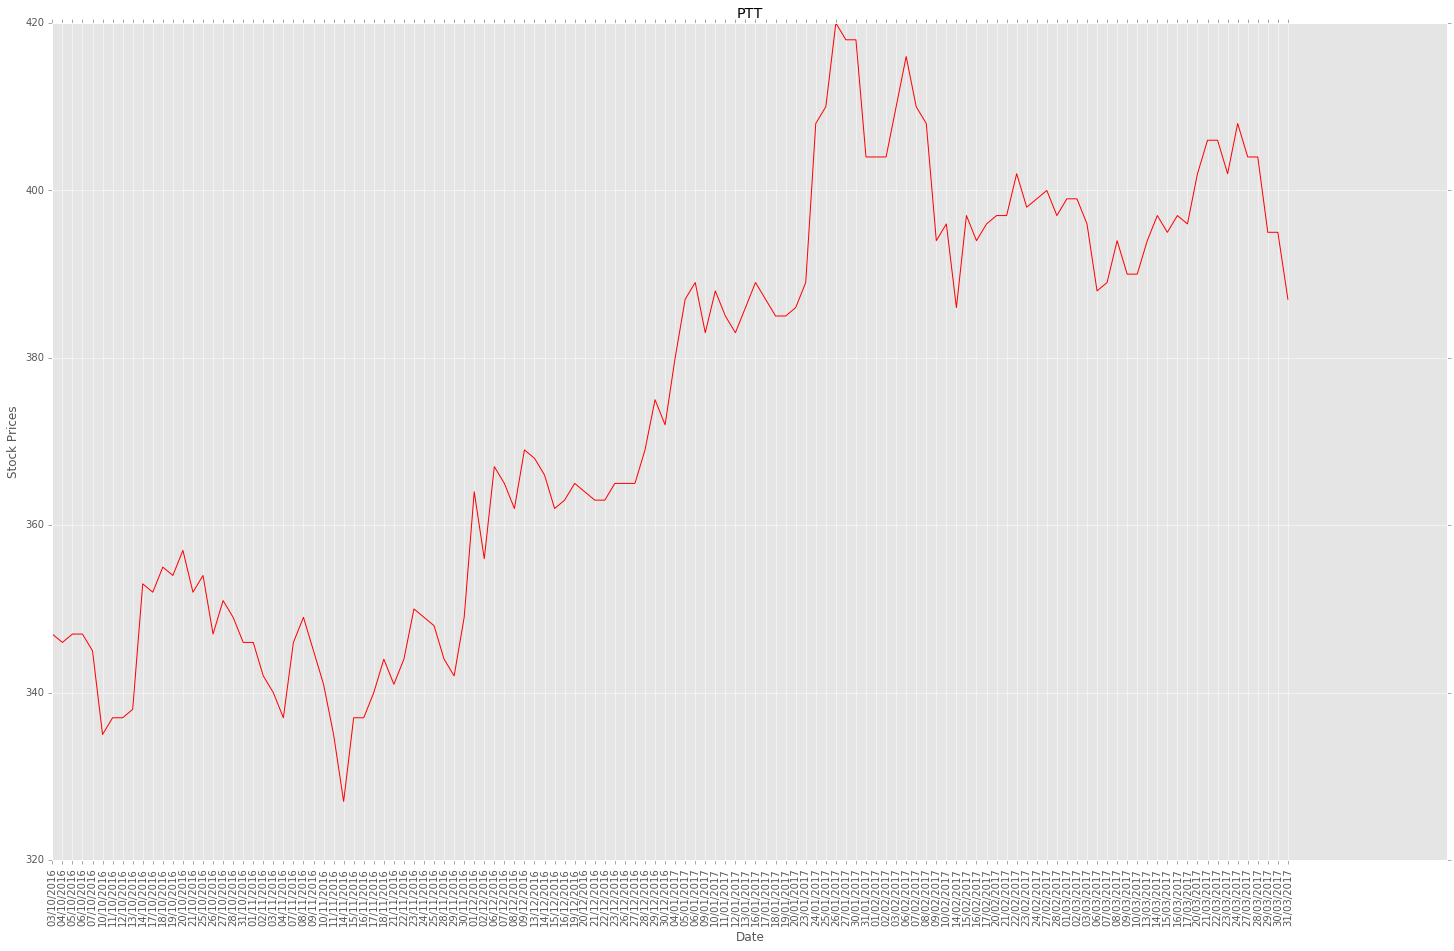

In [97]:
def build_graph2(data, name, date_list):
#     labels = ['วันที่', 'ราคาเปิด', 'ราคาสูงสุด','ราคาต่ำสุด','ราคาปิด', 'เปลี่ยนแปลง', '%เปลี่ยนแปลง','ปริมาณรวม(หุ้น)', 'มูลค่ารวม(000 บาท)' ]
    values = np.array(data)
    data, all_dates = seperate_lists(values)
    length_data = len(data[0])
    dates, prices = find_dot(data, date_list) #Find the point to do dot plot
    x = np.linspace(0, length_data, length_data)
    y = data[4][::-1] 
    labels = data[0][::-1] #this is to reverse the list, so it can order the date by past to recent
    plt.figure(figsize=(25,15))
    plt.plot(x, y, 'r')
#     plt.plot(dates, prices, 'ro')
#     for xc in dates:
#         plt.axvline(x=xc)
    plt.xticks(x, labels, rotation='vertical')
    plt.title(name)
    plt.xlabel('Date')
    plt.ylabel('Stock Prices')
    plt.figure()
    
def build_graph_dataFrame(data, each_stock):
    table2=data['Close Price'].astype(float)
    table2.plot(title=each_stock, figsize=(15, 7))
    plt.xticks(rotation='vertical')
    plt.figure()
    
build_graph2(data,'PTT', date_list[0])

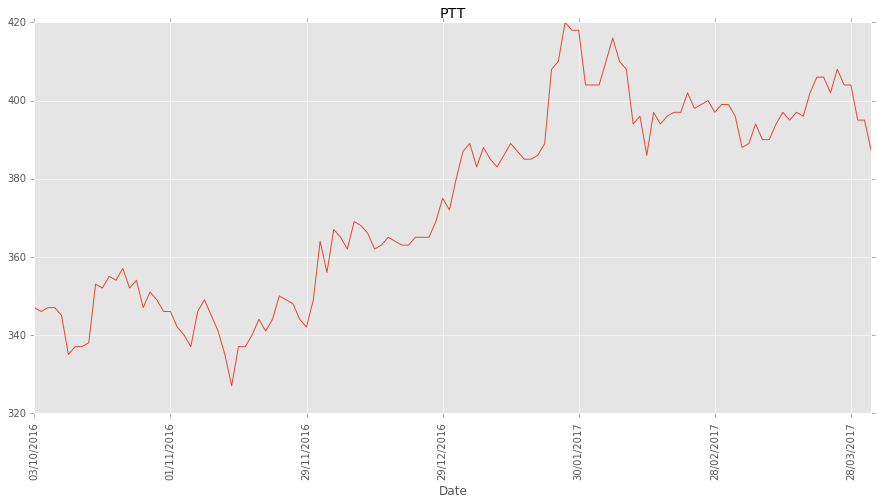

In [98]:
build_graph_dataFrame(data1, 'PTT')

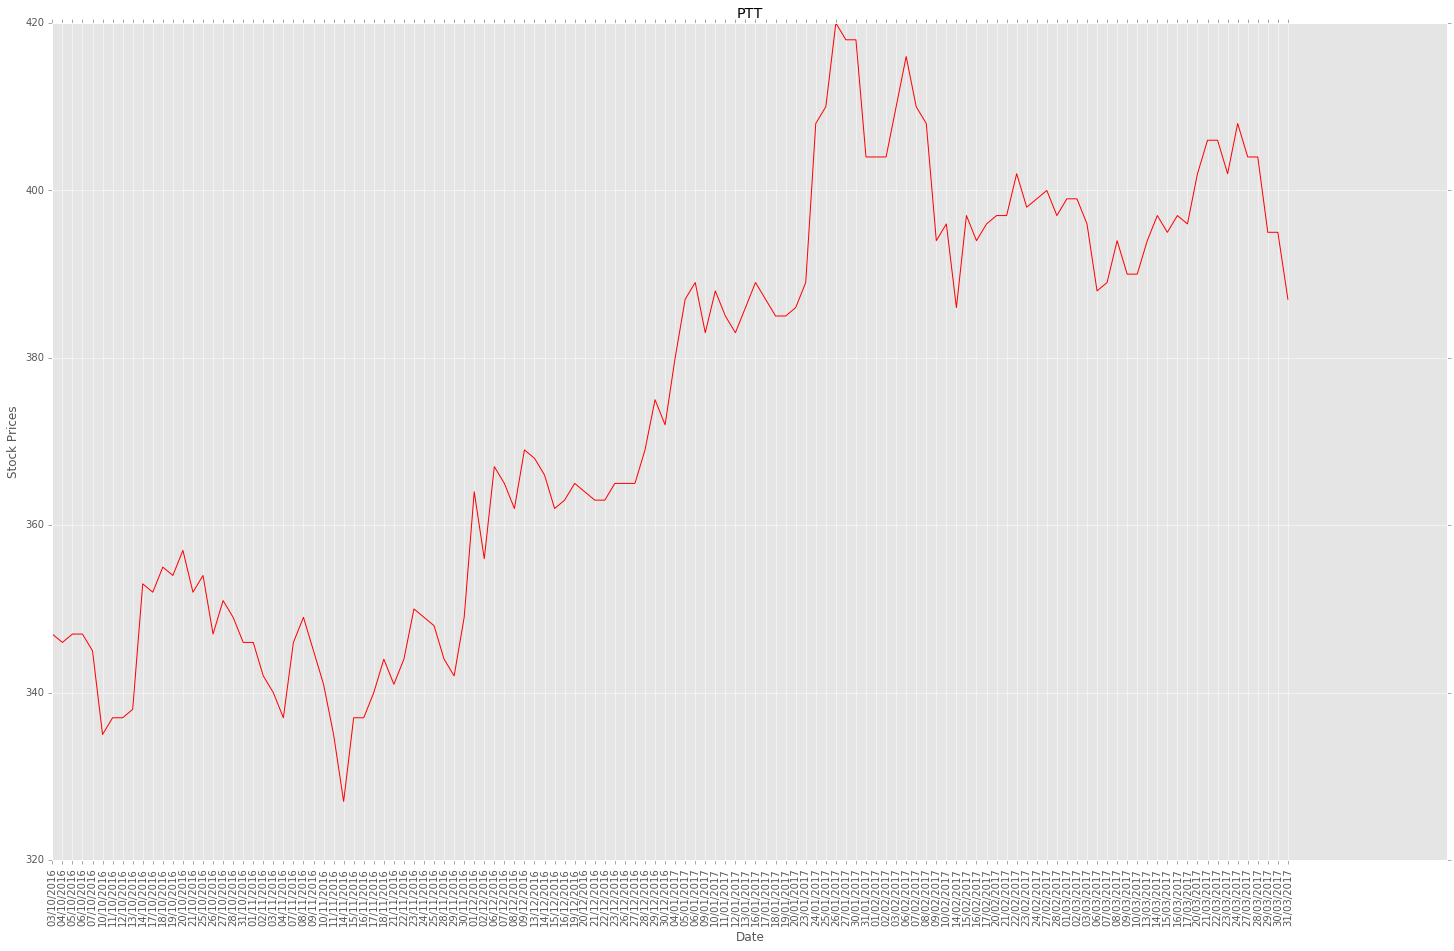

In [99]:
build_graph2(data,'PTT', date_list[0])

### Find Date range between the new's date

In [123]:
def find_dates(all_date_lists, all_dates):
    print all_date_lists
    print all_dates
    keep_interval =[]
    for each_date in all_dates:
        if each_date in all_date_lists:
            print each_date
            get_index = all_date_lists.index(each_date)
            print get_index
            cut_dates = all_date_lists[get_index-5:get_index+5]
            print "cut date = ", cut_dates
            keep_interval.append(cut_dates)
    print keep_interval
    print len(keep_interval[0])
    return keep_interval
#     for each_date_list in all_date_lists:
#         keep_interval = []
#         print each_date_list
#         print '-----'
#         for each_date in each_date_list:
# #             print each_date
#             #check that is the date of new is in list of date in the web
#             if each_date in all_dates:
#                 #if yes then we have to select the interval of that new date
#                 #for example new date = 18/01/2017, and it is in list of date that come from web.
#                 #then we have to pick interval date.
#                 get_index = all_dates.index(each_date)
# #                 print e
#                 cut_dates = all_dates[get_index-5:get_index+5]
#                 keep_interval.append(cut_dates)
# #                 print 'yes = ', each_date
# # #                 print 'cut_dates = ', cut_dates
# #         print len(keep_interval)        
# #         print keep_interval
                
#     return keep_interval




# date_lists = [['18/01/2017', '25/01/2017', '26/01/2017'], ['20/10/2016','28/11/2016','18/01/2017','21/01/2017', '25/01/2017', '26/01/2017']]


# all_dates = [u'03/10/2016', u'04/10/2016', u'05/10/2016', u'06/10/2016', u'07/10/2016', u'10/10/2016', u'11/10/2016', u'12/10/2016', u'13/10/2016', 
#              u'14/10/2016', u'17/10/2016', u'18/10/2016', u'19/10/2016', u'20/10/2016', u'21/10/2016', u'25/10/2016', u'26/10/2016', u'27/10/2016', 
#              u'28/10/2016', u'31/10/2016', u'01/11/2016', u'02/11/2016', u'03/11/2016', u'04/11/2016', u'07/11/2016', u'08/11/2016', u'09/11/2016', 
#              u'10/11/2016', u'11/11/2016', u'14/11/2016', u'15/11/2016', u'16/11/2016', u'17/11/2016', u'18/11/2016', u'21/11/2016', u'22/11/2016', 
#              u'23/11/2016', u'24/11/2016', u'25/11/2016', u'28/11/2016', u'29/11/2016', u'30/11/2016', u'01/12/2016', u'02/12/2016', u'06/12/2016', 
#              u'07/12/2016', u'08/12/2016', u'09/12/2016', u'13/12/2016', u'14/12/2016', u'15/12/2016', u'16/12/2016', u'19/12/2016', u'20/12/2016', 
#              u'21/12/2016', u'22/12/2016', u'23/12/2016', u'26/12/2016', u'27/12/2016', u'28/12/2016', u'29/12/2016', u'30/12/2016', u'04/01/2017', 
#              u'05/01/2017', u'06/01/2017', u'09/01/2017', u'10/01/2017', u'11/01/2017', u'12/01/2017', u'13/01/2017', u'16/01/2017', u'17/01/2017', 
#              u'18/01/2017', u'19/01/2017', u'20/01/2017', u'23/01/2017', u'24/01/2017', u'25/01/2017', u'26/01/2017', u'27/01/2017', u'30/01/2017', 
#              u'31/01/2017', u'01/02/2017', u'02/02/2017', u'03/02/2017', u'06/02/2017', u'07/02/2017', u'08/02/2017', u'09/02/2017', u'10/02/2017', 
#              u'14/02/2017', u'15/02/2017', u'16/02/2017', u'17/02/2017', u'20/02/2017', u'21/02/2017', u'22/02/2017', u'23/02/2017', u'24/02/2017', 
#              u'27/02/2017', u'28/02/2017', u'01/03/2017', u'02/03/2017', u'03/03/2017', u'06/03/2017', u'07/03/2017', u'08/03/2017', u'09/03/2017', 
#              u'10/03/2017', u'13/03/2017', u'14/03/2017', u'15/03/2017', u'16/03/2017', u'17/03/2017', u'20/03/2017', u'21/03/2017', u'22/03/2017', 
#              u'23/03/2017', u'24/03/2017', u'27/03/2017', u'28/03/2017', u'29/03/2017', u'30/03/2017', u'31/03/2017']

all_date_lists =  [u'03/10/2016', u'04/10/2016', u'05/10/2016', u'06/10/2016', u'07/10/2016', u'10/10/2016', u'11/10/2016', u'12/10/2016', u'13/10/2016', u'14/10/2016', u'17/10/2016', u'18/10/2016', u'19/10/2016', u'20/10/2016', u'21/10/2016', u'25/10/2016', u'26/10/2016', u'27/10/2016', u'28/10/2016', u'31/10/2016', u'01/11/2016', u'02/11/2016', u'03/11/2016', u'04/11/2016', u'07/11/2016', u'08/11/2016', u'09/11/2016', u'10/11/2016', u'11/11/2016', u'14/11/2016', u'15/11/2016', u'16/11/2016', u'17/11/2016', u'18/11/2016', u'21/11/2016', u'22/11/2016', u'23/11/2016', u'24/11/2016', u'25/11/2016', u'28/11/2016', u'29/11/2016', u'30/11/2016', u'01/12/2016', u'02/12/2016', u'06/12/2016', u'07/12/2016', u'08/12/2016', u'09/12/2016', u'13/12/2016', u'14/12/2016', u'15/12/2016', u'16/12/2016', u'19/12/2016', u'20/12/2016', u'21/12/2016', u'22/12/2016', u'23/12/2016', u'26/12/2016', u'27/12/2016', u'28/12/2016', u'29/12/2016', u'30/12/2016', u'04/01/2017', u'05/01/2017', u'06/01/2017', u'09/01/2017', u'10/01/2017', u'11/01/2017', u'12/01/2017', u'13/01/2017', u'16/01/2017', u'17/01/2017', u'18/01/2017', u'19/01/2017', u'20/01/2017', u'23/01/2017', u'24/01/2017', u'25/01/2017', u'26/01/2017', u'27/01/2017', u'30/01/2017', u'31/01/2017', u'01/02/2017', u'02/02/2017', u'03/02/2017', u'06/02/2017', u'07/02/2017', u'08/02/2017', u'09/02/2017', u'10/02/2017', u'14/02/2017', u'15/02/2017', u'16/02/2017', u'17/02/2017', u'20/02/2017', u'21/02/2017', u'22/02/2017', u'23/02/2017', u'24/02/2017', u'27/02/2017', u'28/02/2017', u'01/03/2017', u'02/03/2017', u'03/03/2017', u'06/03/2017', u'07/03/2017', u'08/03/2017', u'09/03/2017', u'10/03/2017', u'13/03/2017', u'14/03/2017', u'15/03/2017', u'16/03/2017', u'17/03/2017', u'20/03/2017', u'21/03/2017', u'22/03/2017', u'23/03/2017', u'24/03/2017', u'27/03/2017', u'28/03/2017', u'29/03/2017', u'30/03/2017', u'31/03/2017']
all_dates = ['18/01/2017', '21/01/2017', '25/01/2017', '26/01/2017']
# print all_dates[2:5] #example  
# e = all_dates.index('18/01/2017')
# print e
# print all_dates[e-5:e+5]
# have to pass list of the date's new and list of all date in the web
find_dates(all_date_lists, all_dates)


[u'03/10/2016', u'04/10/2016', u'05/10/2016', u'06/10/2016', u'07/10/2016', u'10/10/2016', u'11/10/2016', u'12/10/2016', u'13/10/2016', u'14/10/2016', u'17/10/2016', u'18/10/2016', u'19/10/2016', u'20/10/2016', u'21/10/2016', u'25/10/2016', u'26/10/2016', u'27/10/2016', u'28/10/2016', u'31/10/2016', u'01/11/2016', u'02/11/2016', u'03/11/2016', u'04/11/2016', u'07/11/2016', u'08/11/2016', u'09/11/2016', u'10/11/2016', u'11/11/2016', u'14/11/2016', u'15/11/2016', u'16/11/2016', u'17/11/2016', u'18/11/2016', u'21/11/2016', u'22/11/2016', u'23/11/2016', u'24/11/2016', u'25/11/2016', u'28/11/2016', u'29/11/2016', u'30/11/2016', u'01/12/2016', u'02/12/2016', u'06/12/2016', u'07/12/2016', u'08/12/2016', u'09/12/2016', u'13/12/2016', u'14/12/2016', u'15/12/2016', u'16/12/2016', u'19/12/2016', u'20/12/2016', u'21/12/2016', u'22/12/2016', u'23/12/2016', u'26/12/2016', u'27/12/2016', u'28/12/2016', u'29/12/2016', u'30/12/2016', u'04/01/2017', u'05/01/2017', u'06/01/2017', u'09/01/2017', u'10/01/2

[[u'11/01/2017',
  u'12/01/2017',
  u'13/01/2017',
  u'16/01/2017',
  u'17/01/2017',
  u'18/01/2017',
  u'19/01/2017',
  u'20/01/2017',
  u'23/01/2017',
  u'24/01/2017'],
 [u'18/01/2017',
  u'19/01/2017',
  u'20/01/2017',
  u'23/01/2017',
  u'24/01/2017',
  u'25/01/2017',
  u'26/01/2017',
  u'27/01/2017',
  u'30/01/2017',
  u'31/01/2017'],
 [u'19/01/2017',
  u'20/01/2017',
  u'23/01/2017',
  u'24/01/2017',
  u'25/01/2017',
  u'26/01/2017',
  u'27/01/2017',
  u'30/01/2017',
  u'31/01/2017',
  u'01/02/2017']]

## This is where we start

In [19]:
def main(stock_names, date_list):
    count = 0
    for each_stock in stock_names:
        data = get_html_detail(each_stock)
        create_data_frame, original_table = build_data_frame(data)
        create_graph = build_graph(data, each_stock, date_list[count]) #plot graph using matplotlib
#         create_graph_dataFrame = build_graph_dataFrame(create_data_frame, each_stock)
        # we need point (x,y) to plot on the graph which is x = date & y = close price
        count += 1
    return create_data_frame

## All functions

['18/01/2017', '21/01/2017', '25/01/2017', '26/01/2017']
[[u'11/01/2017', u'12/01/2017', u'13/01/2017', u'16/01/2017', u'17/01/2017', u'18/01/2017', u'19/01/2017', u'20/01/2017', u'23/01/2017', u'24/01/2017'], [u'18/01/2017', u'19/01/2017', u'20/01/2017', u'23/01/2017', u'24/01/2017', u'25/01/2017', u'26/01/2017', u'27/01/2017', u'30/01/2017', u'31/01/2017'], [u'19/01/2017', u'20/01/2017', u'23/01/2017', u'24/01/2017', u'25/01/2017', u'26/01/2017', u'27/01/2017', u'30/01/2017', u'31/01/2017', u'01/02/2017']]
3
['10/02/2017', '21/02/2017']
[[u'03/02/2017', u'06/02/2017', u'07/02/2017', u'08/02/2017', u'09/02/2017', u'10/02/2017', u'14/02/2017', u'15/02/2017', u'16/02/2017', u'17/02/2017'], [u'14/02/2017', u'15/02/2017', u'16/02/2017', u'17/02/2017', u'20/02/2017', u'21/02/2017', u'22/02/2017', u'23/02/2017', u'24/02/2017', u'27/02/2017']]
2
['19/01/2017', '15/02/2017', '6/10/2016']
[[u'12/01/2017', u'13/01/2017', u'16/01/2017', u'17/01/2017', u'18/01/2017', u'19/01/2017', u'20/01/2017',

,Date,Open Price,Hidhest Price,Lowest Price,Close Price,Change,Percent Change,Overall,Overall Baht
Date,,,,,,,,,
03/10/2016,03/10/2016,17.70,17.90,17.70,17.80,+0.20,+1.14,"13,451,588","239,184.06"
04/10/2016,04/10/2016,17.80,18.40,17.80,18.40,+0.60,+3.37,"62,836,270","1,140,801.30"
05/10/2016,05/10/2016,18.40,18.50,18.20,18.30,-0.10,-0.54,"42,996,303","788,015.42"
06/10/2016,06/10/2016,18.30,18.40,18.10,18.20,-0.10,-0.55,"34,072,784","621,605.44"
07/10/2016,07/10/2016,18.10,18.20,17.90,17.90,-0.30,-1.65,"38,859,836","700,486.22"
10/10/2016,10/10/2016,17.50,17.70,17.40,17.50,-0.40,-2.23,"74,467,050","1,304,343.10"
11/10/2016,11/10/2016,17.70,17.70,17.30,17.40,-0.10,-0.57,"56,337,252","982,971.80"
12/10/2016,12/10/2016,17.40,17.40,16.60,17.00,-0.40,-2.30,"166,675,023","2,833,248.28"
13/10/2016,13/10/2016,16.90,17.20,16.70,17.10,+0.10,+0.59,"74,354,508","1,255,438.30"


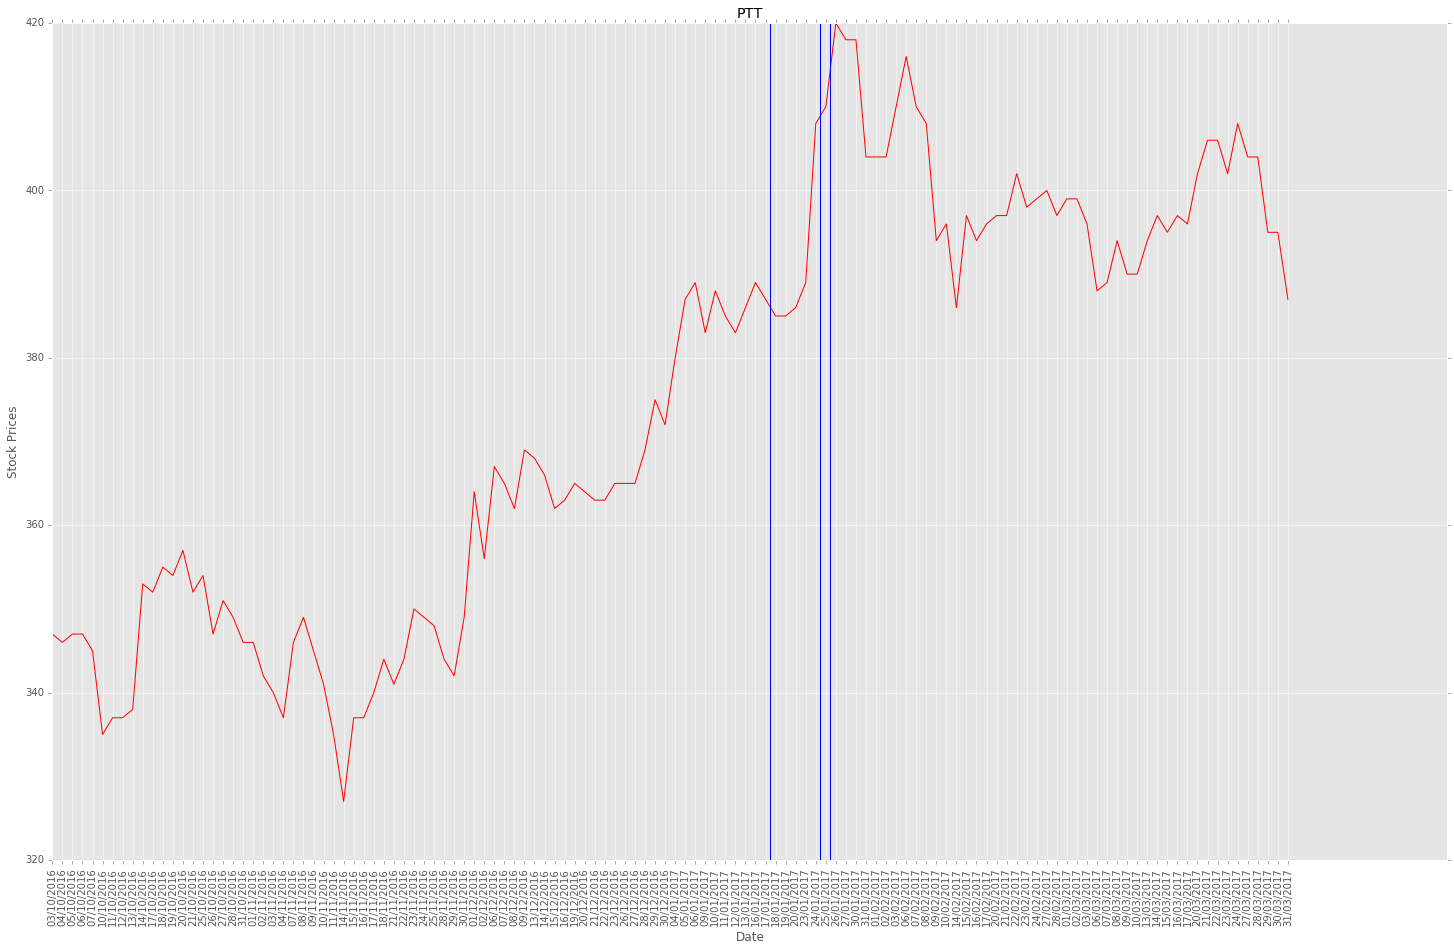

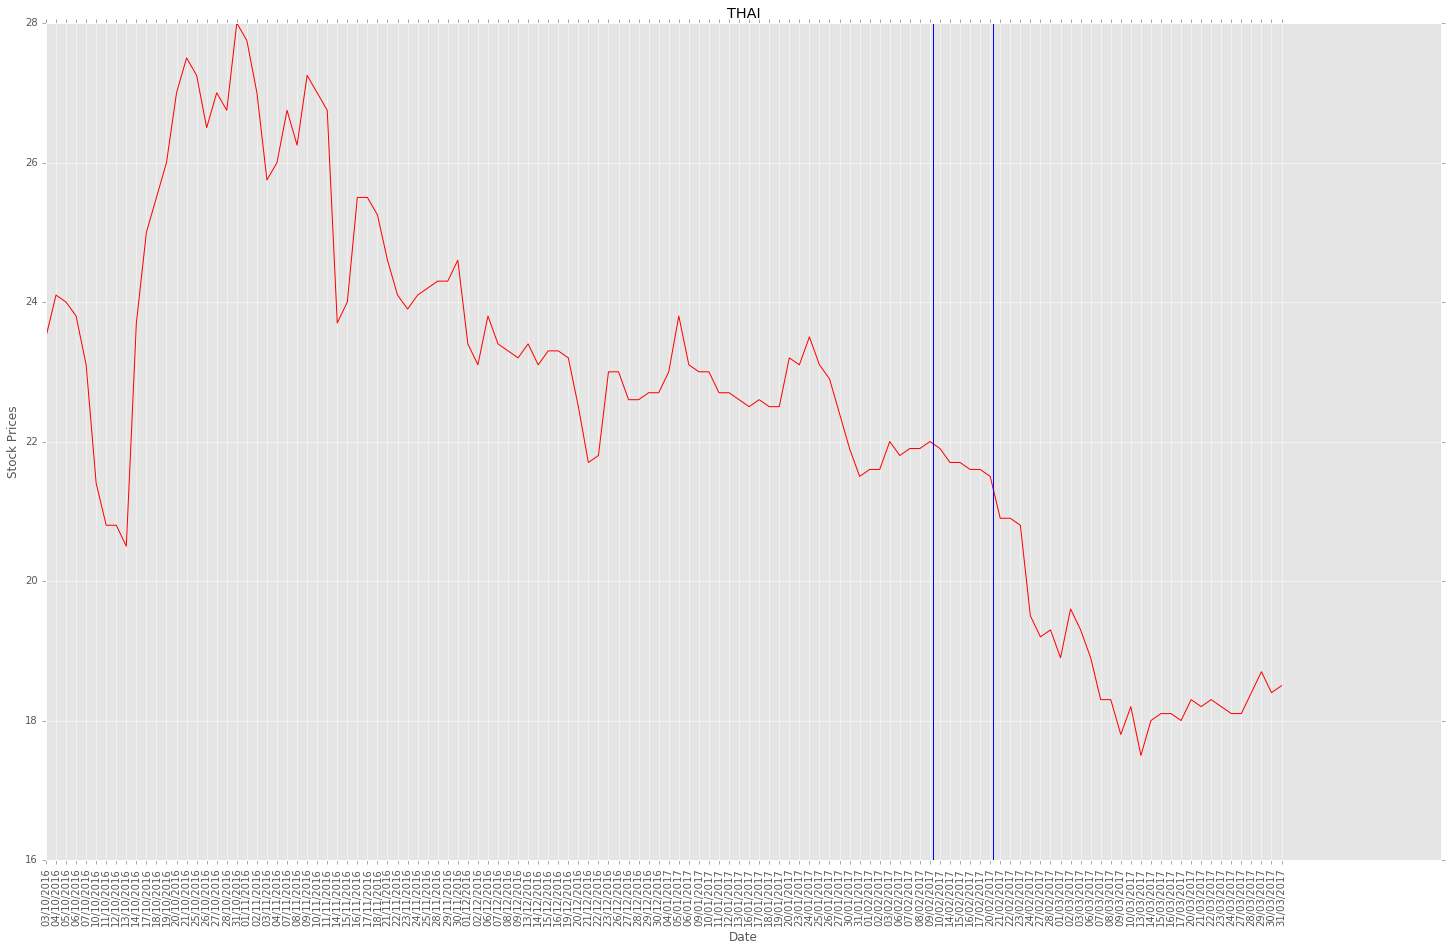

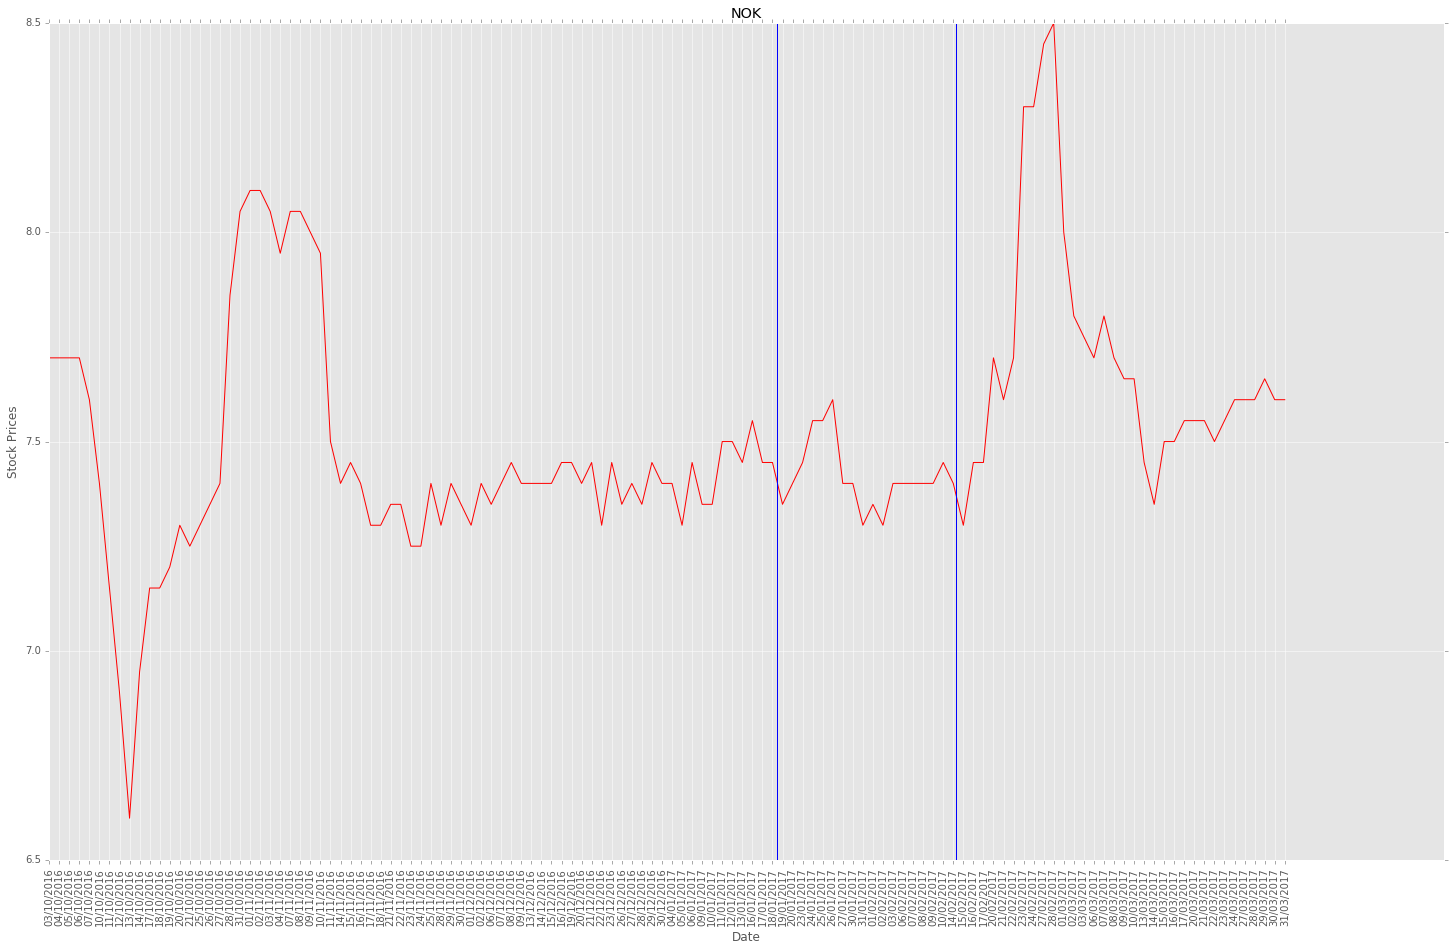

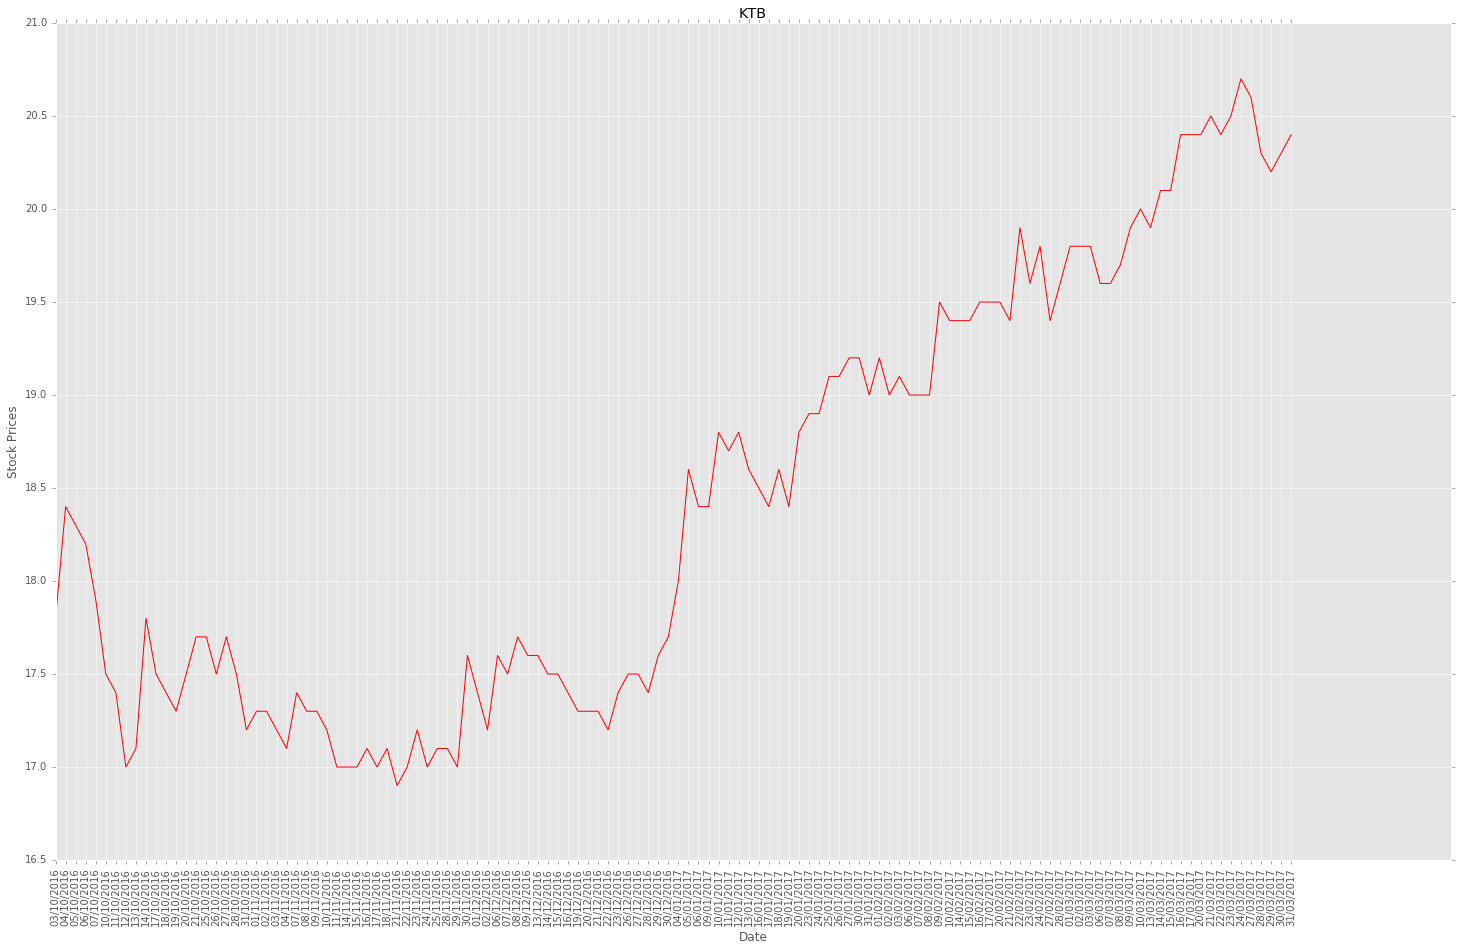

In [125]:
# stock_names = ['BA','AJD', 'ACAP', 'THAI', 'NOK', 'PTT']
stock_names = ['PTT', 'THAI', 'NOK', 'KTB']
date_list = [['18/01/2017','21/01/2017', '25/01/2017', '26/01/2017'],
             ['10/02/2017','21/02/2017'], 
             ['19/01/2017','15/02/2017','6/10/2016'],
             []
            ]

def find_dates(all_date_lists, all_dates):
    #This function is for getting the interval date for each new
    keep_interval =[]
    #loop for each new's date to find the interval
    for each_date in all_dates:
        #if new is in all date that we get from web, then find the interval
        if each_date in all_date_lists:
            get_index = all_date_lists.index(each_date) #this for getting index
            cut_dates = all_date_lists[get_index-5:get_index+5] #to cut the date between the date
            keep_interval.append(cut_dates)
    return keep_interval


def find_dot(data, date_list):
    dates = []
    lowest_price_list = []
    date = data[0][::-1]
    lowest_price = data[3][::-1]
    for each_date in date_list:
        if each_date in date:
            find_date_index = date.index(each_date)
            dates.append(find_date_index)
            lowest_price_list.append(lowest_price[find_date_index])
    return dates, lowest_price_list



def seperate_lists(values):
    data = [[],[],[],[],[],[],[],[],[]]
    for i in values:
        data[0].append(i[0])
        data[1].append(i[1])
        data[2].append(i[2])
        data[3].append(i[3])
        data[4].append(i[4])
        data[5].append(i[5])
        data[6].append(i[6])
        data[7].append(i[7])
        data[8].append(i[8])
    all_dates =  data[0]
    return data, all_dates

def build_data_frame(data):
    values = np.array(data)        
    labels = ['Date', 'Open Price', 'Hidhest Price','Lowest Price','Close Price', 'Change', 'Percent Change','Overall', 'Overall Baht' ]
    data, all_dates = seperate_lists(values)
    keep_val = {}
    count = 0
    for j in labels:
        keep_val[j] = data[count]
        count +=1
    table = pd.DataFrame(keep_val, columns=labels)
    original_table = table
    table = table.sort_index(ascending=False)
    table['Date'] = pd.to_datetime(table['Date'], format='%d%m%Y', errors='ignore')
    table = table.set_index(table['Date'])
    return table, original_table, all_dates

def build_graph(data, name, date_list):
    values = np.array(data)
    data, all_dates = seperate_lists(values)
    length_data = len(data[0])
    dates, prices = find_dot(data, date_list) #Find the point to do dot plot
    x = np.linspace(0, length_data, length_data)
    y = data[4][::-1]
    labels = data[0][::-1]
    plt.figure(figsize=(25,15))
    plt.plot(x, y, 'r')    
    for xc in dates:
        plt.axvline(x=xc)
    plt.xticks(x, labels, rotation='vertical')
    plt.title(name)
    plt.xlabel('Date')
    plt.ylabel('Stock Prices')
    plt.figure()
    
def build_graph_dataFrame(data, each_stock):
    table2=data['Close Price'].astype(float)
    table2.plot(title=each_stock, figsize=(15, 7))
    plt.xticks(rotation='vertical')
    plt.figure()
        


def get_detail(soup, all_data):
    # this function will loop each line in html to get the prices
    all_prices = []
    for i in soup.find_all('tr'): #loop all tr in that page
        each_prices =[]
        for j in i.find_all('td'): #loop all td in that page in tr
            each_prices.append(j.get_text())     
        all_prices.append(each_prices)
    all_prices = all_prices[1:] # cut of the first empty list
    return all_prices


def get_html_detail(each_stock):
    #this function is to get all html code in www.set.or.th
    page_number = 0
    all_data = []
    for i in range(0,3):
        url_front = 'https://www.set.or.th/set/historicaltrading.do?symbol='
        page = '&page='
#         url_bottom = '&language=th&country=TH&type=trading'#Thia
        url_bottom ='&language=en&country=US&type=trading'#Eng
        url = url_front+each_stock+page+str(i)+url_bottom
        b = requests.get(url).text
        soup = BeautifulSoup(b, 'lxml') #this to get all info in that url
        a = get_detail(soup, all_data)
        all_data.append(a)
    all_data = list(itertools.chain.from_iterable(all_data)) #this is to join list of lists
    return all_data

def main(stock_names, date_list):
    count = 0
    for each_stock in stock_names:
        data = get_html_detail(each_stock)
        create_data_frame, original_table, all_date_lists = build_data_frame(data)
        create_graph = build_graph(data, each_stock, date_list[count]) #plot graph using matplotlib
        #create_graph_dataFrame = build_graph_dataFrame(create_data_frame, each_stock)
        # we need point (x,y) to plot on the graph which is x = date & y = close price
        find_interval_dates = find_dates(all_date_lists[::-1], date_list[count])
        count += 1
    return create_data_frame


    
    
ans = main(stock_names, date_list)
ans


